In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD

from src.pre_processing import *

In [2]:
public_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 59 columns):
row_id                                            7426 non-null int64
user_id                                           7426 non-null object
record_id                                         7426 non-null object
recordReceived_ISO8601                            7426 non-null object
recordReceived_secondsSinceMidnight1Jan1970UTC    7426 non-null int64
surveyNumber                                      7426 non-null int64
timestamp                                         7426 non-null datetime64[ns]
startTime                                         7426 non-null datetime64[ns]
associatedAlert                                   6696 non-null object
responseLagSeconds                                6696 non-null float64
dailyAlertNumber                                  6696 non-null float64
spendingDay                                       755 non-null object
spendingDayOther           

In [3]:
train.shape

(5569, 59)

In [4]:
pd.set_option('display.max_columns', 999)

In [5]:
train_subset = create_subset(train, cols_to_keep)
test_subset = create_subset(test, cols_to_keep)

In [8]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 2967 to 2556
Data columns (total 40 columns):
responseLagSeconds             3912 non-null float64
dailyAlertNumber               3912 non-null float64
tiredness                      3912 non-null float64
feelingEmotion                 3912 non-null int64
generalEmotion                 3912 non-null object
specificEmotion                3912 non-null object
intensity                      3912 non-null float64
generalTrigger                 3912 non-null object
specificTrigger                3912 non-null object
bodySensationIntensity         3912 non-null float64
bodySensationForehead          3912 non-null int64
bodySensationEyes              3912 non-null int64
bodySensationJaw               3912 non-null int64
bodySensationNeck              3912 non-null int64
bodySensationShoulders         3912 non-null int64
bodySensationChest             3912 non-null int64
bodySensationArms              3912 non-null int64
bodySensa

In [7]:
train_subset.dropna(inplace=True)
test_subset.dropna(inplace=True)
# this actually dropped a lot... look into other options

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
for col in cols_to_dummify:
    dummify(train_subset, col)
    dummify(test_subset, col)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


pandas.core.series.Series

## SVD - Dimensionality Reduction

In [15]:
X_centered = scale(train_subset, with_mean=False)

In [16]:
svd = TruncatedSVD(n_components=10, n_iter=7)

In [17]:
X_svd = svd.fit_transform(train_subset)

In [18]:
svd.singular_values_

array([2.70509954e+06, 3.22839322e+03, 1.19199627e+02, 7.43925981e+01,
       4.52484549e+01, 3.50815926e+01, 3.31025207e+01, 3.08283953e+01,
       2.84907762e+01, 2.75059074e+01])

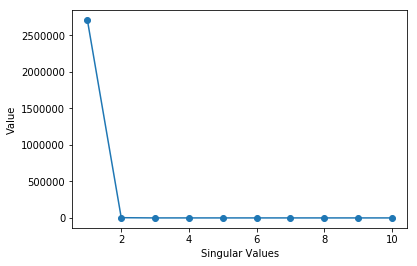

In [19]:
s = svd.singular_values_

x = [i+1 for i in range(len(s))]
plt.plot(x, s, marker='o')
plt.xlabel("Singular Values")
plt.ylabel("Value");

In [34]:
svd.explained_variance_

array([2.30163722e+10, 1.11176367e+03, 2.51828124e+00, 1.43974772e+00,
       5.18942197e-01, 3.09308550e-01, 2.79750046e-01, 2.43599429e-01,
       2.13408981e-01, 1.92136483e-01])

In [35]:
svd.explained_variance_ratio_

array([9.99999951e-01, 4.83031648e-08, 1.09412599e-10, 6.25531962e-11,
       2.25466536e-11, 1.34386311e-11, 1.21543930e-11, 1.05837451e-11,
       9.27205070e-12, 8.34781745e-12])

In [20]:
db_model = DBSCAN(metric='manhattan')

In [21]:
db_model.fit(X_svd)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='manhattan',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [25]:
predictions = db_model.fit_predict(X_svd)

In [26]:
np.unique(predictions, return_counts=True)

(array([-1]), array([3912]))